In [2]:
import numpy as np                #for the numerical operations
import pandas as pd               #for read file and to handle dataframes
import matplotlib.pyplot as plt   #for visuvalisation of the dataset 
import seaborn as sns             #for visuvalisation in the combination of stats method

In [3]:
data=pd.read_csv("Havells amazon.csv")

In [4]:
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Sumit Kumar,26 May 2020,5.0 out of 5 stars,Eat healthy and stay fit!!Worth every penny!!,"Well,my husband and I have been wanting to buy..."
1,1,Aastha,30 November 2018,5.0 out of 5 stars,Worth it,This product is really great...u just have to ...
2,2,Shekhar,14 August 2020,1.0 out of 5 stars,Disappointed with first Havells purchase!,The instruction manual was missing.The recipe ...
3,3,Amazon Customer,6 December 2019,1.0 out of 5 stars,Worst service from Havells,This rating is for Havells service. Sorry to s...
4,4,atul;,11 August 2020,4.0 out of 5 stars,No User Manual Or Recipe book along with deliv...,Product was delivered in a carton box which ha...


In [5]:
data.shape

(300, 6)

In [6]:
data.columns

Index(['Unnamed: 0', 'Customer Name', 'Date', 'Ratings', 'Review Title',
       'Reviews'],
      dtype='object')

In [7]:
data.dtypes

Unnamed: 0        int64
Customer Name    object
Date             object
Ratings          object
Review Title     object
Reviews          object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     300 non-null    int64 
 1   Customer Name  300 non-null    object
 2   Date           300 non-null    object
 3   Ratings        300 non-null    object
 4   Review Title   300 non-null    object
 5   Reviews        300 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.2+ KB


In [9]:
data=data.drop('Unnamed: 0', axis=1)

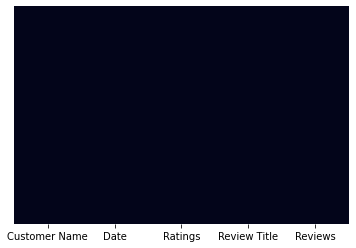

In [10]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [11]:
data.duplicated().sum() 

0

In [12]:
data=data[["Customer Name","Reviews","Ratings"]]

In [13]:
data.head()

,Customer Name,Reviews,Ratings
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",5.0 out of 5 stars
1,Aastha,This product is really great...u just have to ...,5.0 out of 5 stars
2,Shekhar,The instruction manual was missing.The recipe ...,1.0 out of 5 stars
3,Amazon Customer,This rating is for Havells service. Sorry to s...,1.0 out of 5 stars
4,atul;,Product was delivered in a carton box which ha...,4.0 out of 5 stars


In [14]:
data.Ratings=data.Ratings.map({"1.0 out of 5 stars":1,"2.0 out of 5 stars":2,"3.0 out of 5 stars":3,
                               "4.0 out of 5 stars":4,"5.0 out of 5 stars":5})

In [15]:
data.head()

,Customer Name,Reviews,Ratings
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",5
1,Aastha,This product is really great...u just have to ...,5
2,Shekhar,The instruction manual was missing.The recipe ...,1
3,Amazon Customer,This rating is for Havells service. Sorry to s...,1
4,atul;,Product was delivered in a carton box which ha...,4


(array([ 41.,   0.,  12.,   0.,   0.,   6.,   0.,  56.,   0., 185.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

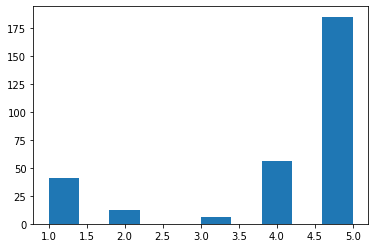

In [16]:
plt.hist(data.Ratings)

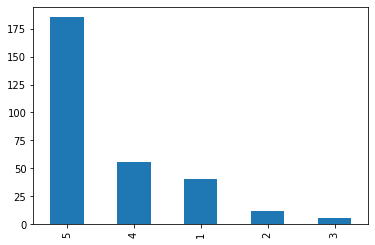

In [17]:
data["Ratings"].value_counts().plot(kind='bar')

In [18]:
data_pos=data[data["Ratings"].isin([4,5])]
data_neg=data[data["Ratings"].isin([1,2])]
data_net=data[data["Ratings"].isin([3])]

In [19]:
data_fil=pd.concat([data_pos,data_neg,data_net])

In [20]:
data_fil.head()

,Customer Name,Reviews,Ratings
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",5
1,Aastha,This product is really great...u just have to ...,5
4,atul;,Product was delivered in a carton box which ha...,4
5,Krishna parekh,Easy to use nd paisa vassol then other compare...,5
6,Avinash Karnik,Good product. Easy to use. Earlier I had order...,4


In [21]:
data_fil.tail()

,Customer Name,Reviews,Ratings
47,krishnaajith,Everything is good . But the product looks lik...,3
126,SALIN,A small damage.Maybe in between transport has ...,3
176,Deepak Goyal,Nice products plz send invoice copy to this ma...,3
251,Amazon Customer,Ok,3
265,Ankush Singh,Delivery was late. Looks good in kitchen. Valu...,3


In [22]:
data_fil.shape

(300, 3)

In [23]:
data_fil["Sentiment"]=1
data_fil["Sentiment"][data_fil["Ratings"].isin([1,2])]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data_fil.head()

,Customer Name,Reviews,Ratings,Sentiment
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",5,1
1,Aastha,This product is really great...u just have to ...,5,1
4,atul;,Product was delivered in a carton box which ha...,4,1
5,Krishna parekh,Easy to use nd paisa vassol then other compare...,5,1
6,Avinash Karnik,Good product. Easy to use. Earlier I had order...,4,1


In [25]:
data=data_fil.drop(["Ratings"],axis="columns")

In [26]:
data.head()

,Customer Name,Reviews,Sentiment
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",1
1,Aastha,This product is really great...u just have to ...,1
4,atul;,Product was delivered in a carton box which ha...,1
5,Krishna parekh,Easy to use nd paisa vassol then other compare...,1
6,Avinash Karnik,Good product. Easy to use. Earlier I had order...,1


In [27]:
data.Sentiment.unique()

array([1, 0])

In [28]:
#we can find the sentiment of the reviews by the another method that is using TEXTBLOB

In [29]:
!pip install textblob

In [30]:
from textblob import TextBlob

In [31]:
x=data.iloc[:,0:2]
y=data.iloc[:,1:3]

In [32]:
y=y.drop(["Reviews"],axis="columns")

In [33]:
y.head()

,Sentiment
0,1
1,1
4,1
5,1
6,1


In [34]:
x.shape

(300, 2)

In [35]:
x.head()

,Customer Name,Reviews
0,Sumit Kumar,"Well,my husband and I have been wanting to buy..."
1,Aastha,This product is really great...u just have to ...
4,atul;,Product was delivered in a carton box which ha...
5,Krishna parekh,Easy to use nd paisa vassol then other compare...
6,Avinash Karnik,Good product. Easy to use. Earlier I had order...


In [36]:
x.reset_index(inplace=True)
y.reset_index(inplace=True)  

In [37]:
polarity_score=[]

for i in range(0,x.shape[0]):
  score=TextBlob(x.iloc[i][2])
  score1=score.sentiment[0]
  polarity_score.append(score1)

In [38]:
x=pd.concat([x,pd.Series(polarity_score)],axis=1)

In [39]:
x.rename(columns={x.columns[3]:"label"},inplace=True)

In [40]:
x.head()

,index,Customer Name,Reviews,label
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488
1,1,Aastha,This product is really great...u just have to ...,0.411111
2,4,atul;,Product was delivered in a carton box which ha...,0.180556
3,5,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167
4,6,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609


In [41]:
data=pd.concat([x,y],axis="columns")

In [42]:
data.head()

,index,Customer Name,Reviews,label,index,Sentiment
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,0,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1,1
2,4,atul;,Product was delivered in a carton box which ha...,0.180556,4,1
3,5,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,5,1
4,6,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,6,1


In [43]:
data=data.drop(["index"],axis=1)

In [44]:
data.head()

,Customer Name,Reviews,label,Sentiment
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1
1,Aastha,This product is really great...u just have to ...,0.411111,1
2,atul;,Product was delivered in a carton box which ha...,0.180556,1
3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1
4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1


In [45]:
data.tail()

,Customer Name,Reviews,label,Sentiment
295,krishnaajith,Everything is good . But the product looks lik...,0.221852,1
296,SALIN,A small damage.Maybe in between transport has ...,0.208333,1
297,Deepak Goyal,Nice products plz send invoice copy to this ma...,0.400000,1
298,Amazon Customer,Ok,0.500000,1
299,Ankush Singh,Delivery was late. Looks good in kitchen. Valu...,0.125000,1


In [46]:
data.reset_index(inplace=True)

In [47]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1
2,2,atul;,Product was delivered in a carton box which ha...,0.180556,1
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1


In [48]:
len(data[data.label>0])

243

In [49]:
len(data[data.label<0])

28

In [50]:
data.Sentiment.value_counts()

1    247
0     53
Name: Sentiment, dtype: int64

In [51]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1
2,2,atul;,Product was delivered in a carton box which ha...,0.180556,1
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1


In [52]:
data["Sentiment1"]=data['label'].apply(lambda k: 1 if k>=0 else 0)

In [53]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1,1
2,2,atul;,Product was delivered in a carton box which ha...,0.180556,1,1
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1,1
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1,1


In [54]:
data.tail()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
295,295,krishnaajith,Everything is good . But the product looks lik...,0.221852,1,1
296,296,SALIN,A small damage.Maybe in between transport has ...,0.208333,1,1
297,297,Deepak Goyal,Nice products plz send invoice copy to this ma...,0.400000,1,1
298,298,Amazon Customer,Ok,0.500000,1,1
299,299,Ankush Singh,Delivery was late. Looks good in kitchen. Valu...,0.125000,1,1


In [55]:
data.Sentiment.value_counts()

1    247
0     53
Name: Sentiment, dtype: int64

In [56]:
data.Sentiment1.value_counts()

1    272
0     28
Name: Sentiment1, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm=confusion_matrix(data.Sentiment,data.Sentiment1)

In [59]:
cm

array([[ 20,  33],
       [  8, 239]])

In [60]:
data1=data[data["Sentiment"]!=data["Sentiment1"]]

In [61]:
data1

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
5,5,Neha gupta,This air fryer fulfills what it promises. its ...,-0.021429,1,0
11,11,DEVESH AGARWAL,I was very doubtful about this technology of a...,-0.134286,1,0
21,21,Ramana,Tried Fish fry and chicken fry ( South Indian...,-0.050000,1,0
31,31,Amazon Customer,Missing contents. Received this product withou...,-0.200000,1,0
63,63,Abhay B.,We have been using this since 3 months now. No...,-0.254762,1,0
88,88,Pradeep Krishna Suryadevara,Never better to use the air fryer than a conve...,-0.026623,1,0
119,119,Prabhat kr,Not easy in use,-0.216667,1,0
241,241,Shekhar,The instruction manual was missing.The recipe ...,0.068182,0,1
244,244,Deepak malik,Old product damage product used product,0.100000,0,1
245,245,Deepa Joshi,Your browser does not support HTML5 video.\n\n...,0.125000,0,1


In [62]:
print("Wrongly classified are:",len(data1))

Wrongly classified are: 41


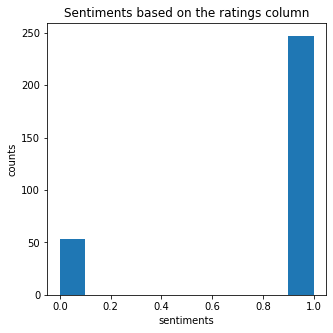

In [63]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

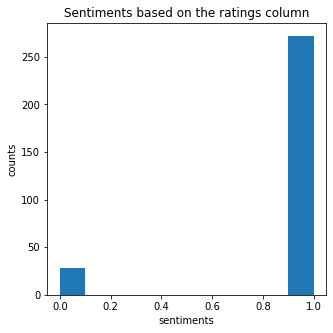

In [64]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment1)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

In [65]:
#to find out the wrongly classified 

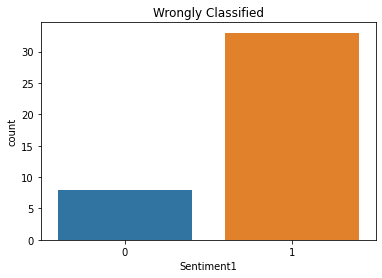

In [66]:
sns.countplot(data=data1, x= 'Sentiment1')
plt.title("Wrongly Classified");

In [67]:
#building the wordcloud for the positive,negative and neutral

In [68]:
from wordcloud import WordCloud

In [69]:
import nltk
from nltk.corpus import stopwords

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [71]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1,1
2,2,atul;,Product was delivered in a carton box which ha...,0.180556,1,1
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1,1
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1,1


In [72]:
#word cloud on the reviews columns in the dataset

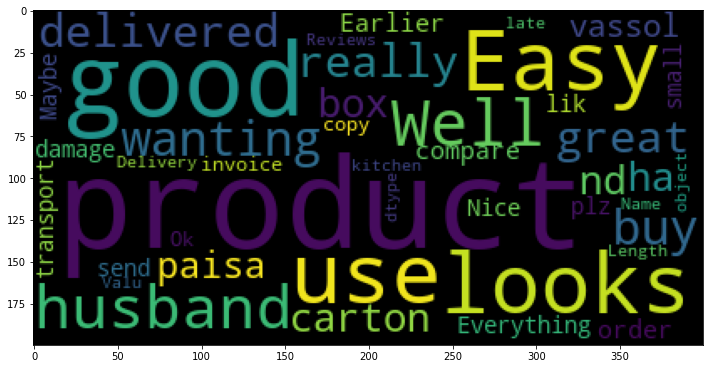

In [73]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words("english")).generate(str(data.Reviews))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [74]:
data_pos=data[data.Sentiment==1]
data_pos.shape

(247, 6)

In [75]:
data_neg=data[data.Sentiment==0]
data_neg.shape

(53, 6)

In [76]:
#wordcloud on the postive reviews in the dataset

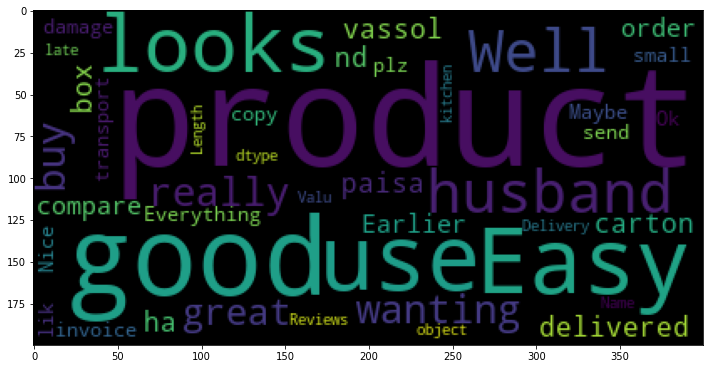

In [77]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_pos["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [78]:
#wordcloud on the neutral reviews in the dataset

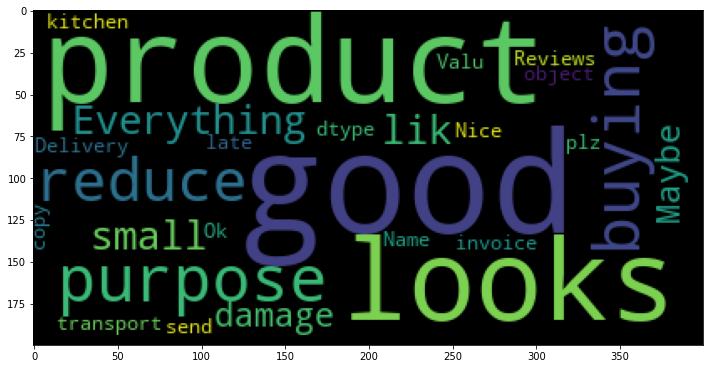

In [79]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_net["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [80]:
#wordcloud on the negative reviews in the dataset

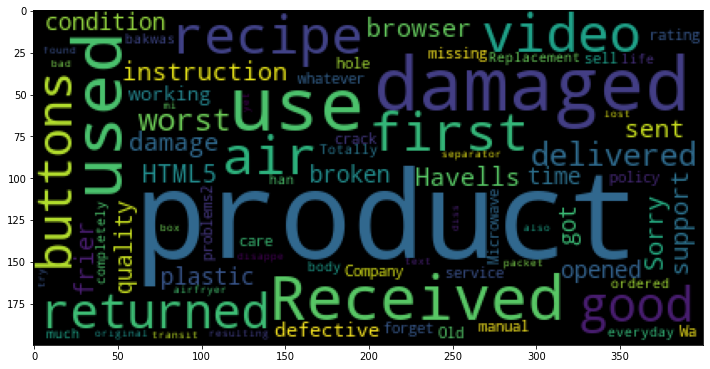

In [81]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_neg["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [82]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",0.371488,1,1
1,1,Aastha,This product is really great...u just have to ...,0.411111,1,1
2,2,atul;,Product was delivered in a carton box which ha...,0.180556,1,1
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,0.154167,1,1
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,0.183609,1,1


In [83]:
#seperate the depended and independed variable
remove=["label","Sentiment","Sentiment1"]
x=data.drop(labels=remove,axis=1)

In [84]:
remove=["Reviews","label","Sentiment1"]
y=data.drop(labels=remove,axis=1)

In [85]:
y

,index,Customer Name,Sentiment
0,0,Sumit Kumar,1
1,1,Aastha,1
2,2,atul;,1
3,3,Krishna parekh,1
4,4,Avinash Karnik,1
...,...,...,...
295,295,krishnaajith,1
296,296,SALIN,1
297,297,Deepak Goyal,1
298,298,Amazon Customer,1


In [86]:
import re                               #regular expression
import nltk                              #Natural Language Toolkit 
from nltk.corpus import stopwords         #the common words in the language
from nltk.stem import WordNetLemmatizer    #converts the similar words into the single word with sence

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [88]:
lem=WordNetLemmatizer()

In [89]:
corpus=[]

In [90]:
#clean data in this
    #we remove stopwords
    #we convert all into lower case
    #we split the sentences into words 
    #by using words it lematise the words
    #after we combine into sentence
    #finally we should append it to corpus

In [91]:
for i in range(0,len(x)):
  review=re.sub('[^a-zA-Z0-9]',' ',x.Reviews[i])
  review=review.lower()
  review=review.split()
  review=[lem.lemmatize(word)for word in review if word not in set (stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [92]:
x.Reviews[1]

'This product is really great...u just have to be realistic regarding your expectations from an air fryer...it makes tasty n delicious food but obviously healthy food is not going to taste as good as it’s fried version...but the difference in taste for frozen snacks is not much n I prefer air fried snacks n potato chips any day over fried ones.'

In [93]:
corpus[1]

'product really great u realistic regarding expectation air fryer make tasty n delicious food obviously healthy food going taste good fried version difference taste frozen snack much n prefer air fried snack n potato chip day fried one'

In [94]:
df=pd.DataFrame(corpus)

In [95]:
data=pd.concat([x,df],axis=1)

In [96]:
data.head()

,index,Customer Name,Reviews,0
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...
1,1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...
2,2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...


In [97]:
data.rename(columns={0:"cleaned Reviews"},inplace=True)

In [98]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...
1,1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...
2,2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...


In [99]:
!pip install texthero

     |████████████████████████████████| 1.5MB 15.7MB/s 
     |████████████████████████████████| 245kB 20.7MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [100]:
import texthero as hero

In [101]:
data['tfidf']=(
    data['cleaned Reviews']
    .pipe(hero.clean)
    .pipe(hero.tfidf)        #->remove 'do_'
)

In [102]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,..."
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [103]:
#appling the clustering to the tfidf

In [104]:
data['kmeans']=(
    data['tfidf']
    .pipe(hero.kmeans,n_clusters=2)       #->remove 'do_'
    .astype(str)
)

In [105]:
data.kmeans.unique()

array(['0', '1'], dtype=object)

In [106]:
#we have to reduce the feature by applying PCA on tfidf feature

In [107]:
data['pca']=data['tfidf'].pipe(hero.pca)      #->remove 'do_'

In [108]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.05129324728012718, -0.1624073932248546]"
1,1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.02180769478874662, -0.11725853145082347]"
2,2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,...",0,"[0.05365793325783239, -0.052665934642326204]"
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09393190077261289, -0.07120234404730989]"
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.01173788301093658, -0.029059521980888015]"


In [109]:
hero.scatterplot(data,'pca',color='kmeans',title="reviews grouping")
plt.figure(figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

In [110]:
#Plot of most used words
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(data['cleaned Reviews'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_

In [111]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram

,frequency,bigram
0,34,easy use
1,25,nice product
2,25,air fryer
3,24,good product
4,11,recipe book
...,...,...
2664,1,15 day
2665,1,10 time
2666,1,10 leg
2667,1,10 000


In [112]:
df_plot=df_ngram.head(10)
df_plot

,frequency,bigram
0,34,easy use
1,25,nice product
2,25,air fryer
3,24,good product
4,11,recipe book
5,11,french fry
6,11,excellent product
7,10,value money
8,9,product easy
9,8,product good


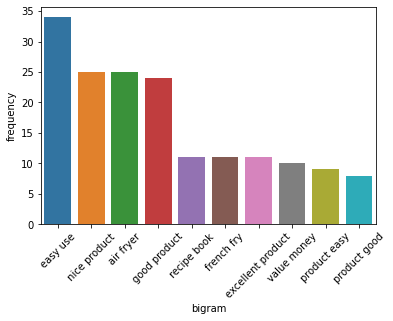

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="bigram", y="frequency", data=df_plot)
plt.xticks(rotation=45)
plt.show()

# Emotion mining

In [114]:
!pip install text2emotion

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 133kB 4.9MB/s 


In [115]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
data["Emotion"]=data["cleaned Reviews"].apply(lambda text: te.get_emotion(text))
data["Emotion"]

0      {'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...
1      {'Happy': 0.58, 'Angry': 0.0, 'Surprise': 0.08...
2      {'Happy': 0.23, 'Angry': 0.15, 'Surprise': 0.1...
3      {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
4      {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.38...
                             ...                        
295    {'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.1...
296    {'Happy': 0.5, 'Angry': 0.5, 'Surprise': 0.0, ...
297    {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...
298    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
299    {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...
Name: Emotion, Length: 300, dtype: object

In [117]:
data['Happy']  = data["Emotion"].apply(lambda score_dict: score_dict['Happy'])
data["Happy"]

0      0.30
1      0.58
2      0.23
3      1.00
4      0.25
       ... 
295    0.33
296    0.50
297    0.50
298    0.00
299    0.50
Name: Happy, Length: 300, dtype: float64

In [118]:
data['Angry']  = data["Emotion"].apply(lambda score_dict: score_dict['Angry'])
data["Angry"]

0      0.00
1      0.00
2      0.15
3      0.00
4      0.00
       ... 
295    0.11
296    0.50
297    0.00
298    0.00
299    0.00
Name: Angry, Length: 300, dtype: float64

In [119]:
data['Surprise']  = data["Emotion"].apply(lambda score_dict: score_dict['Surprise'])
data["Surprise"]

0      0.20
1      0.08
2      0.15
3      0.00
4      0.38
       ... 
295    0.11
296    0.00
297    0.00
298    0.00
299    0.00
Name: Surprise, Length: 300, dtype: float64

In [120]:
data['Sad']  = data["Emotion"].apply(lambda score_dict: score_dict['Sad'])
data["Sad"]

0      0.20
1      0.17
2      0.23
3      0.00
4      0.12
       ... 
295    0.22
296    0.00
297    0.00
298    0.00
299    0.50
Name: Sad, Length: 300, dtype: float64

In [121]:
data['Fear']  = data["Emotion"].apply(lambda score_dict: score_dict['Fear'])
data["Fear"]

0      0.30
1      0.17
2      0.23
3      0.00
4      0.25
       ... 
295    0.22
296    0.00
297    0.50
298    0.00
299    0.00
Name: Fear, Length: 300, dtype: float64

In [122]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.05129324728012718, -0.1624073932248546]","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...",0.30,0.00,0.20,0.20,0.30
1,1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.02180769478874662, -0.11725853145082347]","{'Happy': 0.58, 'Angry': 0.0, 'Surprise': 0.08...",0.58,0.00,0.08,0.17,0.17
2,2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,...",0,"[0.05365793325783239, -0.052665934642326204]","{'Happy': 0.23, 'Angry': 0.15, 'Surprise': 0.1...",0.23,0.15,0.15,0.23,0.23
3,3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09393190077261289, -0.07120234404730989]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00
4,4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.01173788301093658, -0.029059521980888015]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.38...",0.25,0.00,0.38,0.12,0.25


In [123]:
data=data.drop("index",axis=1)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.05129324728012718, -0.1624073932248546]","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...",0.30,0.00,0.20,0.20,0.30
1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.02180769478874662, -0.11725853145082347]","{'Happy': 0.58, 'Angry': 0.0, 'Surprise': 0.08...",0.58,0.00,0.08,0.17,0.17
2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,...",0,"[0.05365793325783239, -0.052665934642326204]","{'Happy': 0.23, 'Angry': 0.15, 'Surprise': 0.1...",0.23,0.15,0.15,0.23,0.23
3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09393190077261289, -0.07120234404730989]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00
4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.01173788301093658, -0.029059521980888015]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.38...",0.25,0.00,0.38,0.12,0.25


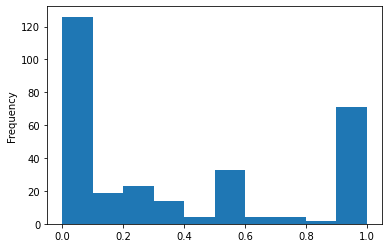

In [124]:
#Histogram of Happy emotion from the reviews
data["Happy"].plot(kind="hist")

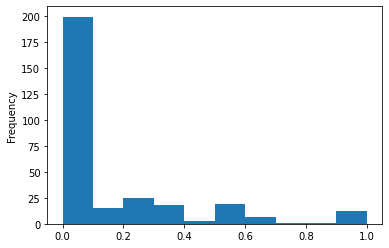

In [125]:
#Histogram of Sad emotion from the reviews
data["Sad"].plot(kind="hist")

Happy  Angry  Surprise  Sad  Fear
0.3    0.0    0.2       0.2  0.3     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

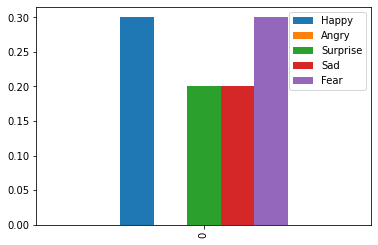

In [126]:
#Histogram of the first review
data.head(1).groupby(["Happy","Angry","Surprise","Sad","Fear"]).plot(kind="bar")

# Parts Of Speech tagging

In [127]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [128]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [129]:
# Loop to get just the adjectives from each review
words_adj = []
for line in data['Reviews']:  
    doc= nlp(line) 
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ'] 
    words_adj.append(tokens)

In [130]:
# create a new column with the adjectives
data['words_adj'] = pd.Series(words_adj)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.05129324728012718, -0.1624073932248546]","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...",0.30,0.00,0.20,0.20,0.30,"[awesome, less, normal, new, awesome, easy, co..."
1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.02180769478874662, -0.11725853145082347]","{'Happy': 0.58, 'Angry': 0.0, 'Surprise': 0.08...",0.58,0.00,0.08,0.17,0.17,"[great, realistic, tasty, delicious, healthy, ..."
2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,...",0,"[0.05365793325783239, -0.052665934642326204]","{'Happy': 0.23, 'Angry': 0.15, 'Surprise': 0.1...",0.23,0.15,0.15,0.23,0.23,"[intact, good, main, official, first, blank, g..."
3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09393190077261289, -0.07120234404730989]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00,"[easy, other, economic, happy]"
4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.01173788301093658, -0.029059521980888015]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.38...",0.25,0.00,0.38,0.12,0.25,"[good, easy, different, only, new, satisfied, ..."


In [131]:
#MOST COMMON POSITIVE ADJECTIVES
from collections import Counter
positive_adj= data[data['kmeans']=='0']['words_adj']
pos_words= [line for line in positive_adj for line in set(line)]
pos_adj_count= Counter(pos_words).most_common(10)
pos_adj_count

[('good', 83),
 ('easy', 48),
 ('excellent', 19),
 ('great', 17),
 ('useful', 17),
 ('healthy', 16),
 ('other', 13),
 ('less', 12),
 ('fried', 11),
 ('nice', 11)]

In [132]:
dfp=pd.DataFrame(pos_adj_count)
dfp

,0,1
0,good,83
1,easy,48
2,excellent,19
3,great,17
4,useful,17
5,healthy,16
6,other,13
7,less,12
8,fried,11
9,nice,11


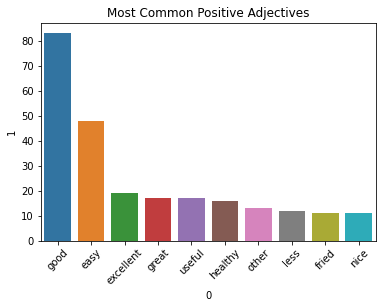

In [133]:
#Plot to show the positive adjectives
sns.barplot(x=0, y=1, data=dfp)
plt.xticks(rotation=45)
plt.title("Most Common Positive Adjectives");
plt.show()

In [134]:
#MOST COMMON NEGATIVE ADJECTIVES
import collections
negative_adj= data[data['kmeans']=='1']['words_adj']
neg_words= [line for line in negative_adj for line in set(line)]
neg_adj_count= collections.Counter(neg_words).most_common(10)
neg_adj_count


[('nice', 17), ('easy', 4), ('happy', 1)]

In [135]:
dfn=pd.DataFrame(neg_adj_count)
dfn

,0,1
0,nice,17
1,easy,4
2,happy,1


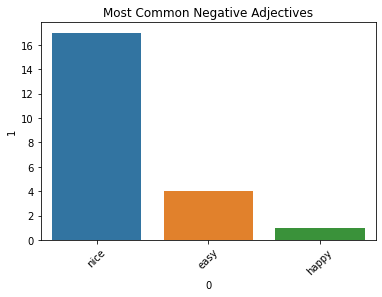

In [136]:
#Plot to show negative adjectives
sns.barplot(x=0, y=1, data=dfn)
plt.xticks(rotation=45)
plt.title("Most Common Negative Adjectives");
plt.show()

# Named Entity Recognition

In [137]:
rev=data['Reviews']
rev[0]

"Well,my husband and I have been wanting to buy it from quite sometime after we have practically seen how awesome food it cooks and that too with much much less oil than normal cooking.I am totally in love with my new kitchen machine.I have cooked litti(Bihari delicacy) and it's awesome and super easy and convenient to make them in this machine.I have cooked besan wali bhindi,grilled chiken and pakodas,will be trying out samosas very soon.Got for it guys,it's worth every penny.Save  yourself with all the fried food without compromising too much on the taste."

In [138]:
import spacy
from spacy import displacy


nlp = spacy.load("en_core_web_sm")
doc = nlp(rev[0])
displacy.render(doc, style="dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="aac461e6b2da434fbef1d35a0cc83b51-0" class="displacy" width="18600" height="1012.0" direction="ltr" style="max-width: none; height: 1012.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="922.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Well,</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">INTJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="922.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">my</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="922.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">husband</tspan>\n    <tspan class="displa

In [139]:
displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">Well,my husband and I have been wanting to buy it from quite sometime after we have practically seen how awesome food it cooks and that too with much much less oil than normal cooking.I am totally in love with my new kitchen machine.I have cooked litti(Bihari delicacy) and it\'s awesome and super easy and convenient to make them in this machine.I have cooked \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    besan wali bhindi\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n,grilled chiken and pakodas,will be trying out samosas very soon.Got for it guys,it\'s worth every penny.Save  yourself with all the fried food without compromising too much on the taste.</div>'

In [140]:
import gensim
from gensim import corpora,models
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [141]:
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Sumit Kumar,"Well,my husband and I have been wanting to buy...",well husband wanting buy quite sometime practi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.05129324728012718, -0.1624073932248546]","{'Happy': 0.3, 'Angry': 0.0, 'Surprise': 0.2, ...",0.30,0.00,0.20,0.20,0.30,"[awesome, less, normal, new, awesome, easy, co..."
1,Aastha,This product is really great...u just have to ...,product really great u realistic regarding exp...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.02180769478874662, -0.11725853145082347]","{'Happy': 0.58, 'Angry': 0.0, 'Surprise': 0.08...",0.58,0.00,0.08,0.17,0.17,"[great, realistic, tasty, delicious, healthy, ..."
2,atul;,Product was delivered in a carton box which ha...,product delivered carton box box containing ai...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.12882195746998473,...",0,"[0.05365793325783239, -0.052665934642326204]","{'Happy': 0.23, 'Angry': 0.15, 'Surprise': 0.1...",0.23,0.15,0.15,0.23,0.23,"[intact, good, main, official, first, blank, g..."
3,Krishna parekh,Easy to use nd paisa vassol then other compare...,easy use nd paisa vassol compare economic happ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09393190077261289, -0.07120234404730989]","{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...",1.00,0.00,0.00,0.00,0.00,"[easy, other, economic, happy]"
4,Avinash Karnik,Good product. Easy to use. Earlier I had order...,good product easy use earlier ordered differen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.01173788301093658, -0.029059521980888015]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.38...",0.25,0.00,0.38,0.12,0.25,"[good, easy, different, only, new, satisfied, ..."


In [142]:
data.columns

Index(['Customer Name', 'Reviews', 'cleaned Reviews', 'tfidf', 'kmeans', 'pca',
       'Emotion', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear', 'words_adj'],
      dtype='object')

In [143]:
#from the above we need only Reviews column to find the topics of the in the each review column

In [144]:
remove=["Customer Name","cleaned Reviews","tfidf","kmeans","pca","Emotion","Happy","Angry","Surprise","Sad","Fear","words_adj"]
data1=data.drop(labels=remove,axis="columns")

In [145]:
data1.head()

,Reviews
0,"Well,my husband and I have been wanting to buy..."
1,This product is really great...u just have to ...
2,Product was delivered in a carton box which ha...
3,Easy to use nd paisa vassol then other compare...
4,Good product. Easy to use. Earlier I had order...


In [146]:
#this is the raw data we have to clean the data
#to find the topics in the each topic modelling in reviews 

In [147]:
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [148]:
data1["review_clean"]=data1["Reviews"].apply(clean)

In [149]:
data1.head()

,Reviews,review_clean
0,"Well,my husband and I have been wanting to buy...","[wellmy, husband, wanting, buy, quite, sometim..."
1,This product is really great...u just have to ...,"[product, really, greatu, realistic, regarding..."
2,Product was delivered in a carton box which ha...,"[product, delivered, carton, box, box, contain..."
3,Easy to use nd paisa vassol then other compare...,"[easy, use, nd, paisa, vassol, compare, econom..."
4,Good product. Easy to use. Earlier I had order...,"[good, product, easy, use, earlier, ordered, d..."


In [150]:
data1["review_clean"][3]

['easy', 'use', 'nd', 'paisa', 'vassol', 'compare', 'economichappy', 'product']

In [151]:
#create dictionary
dictionary=corpora.Dictionary(data1["review_clean"])

In [152]:
len(dictionary)

1259

In [153]:
#total no of non-zeros in the dictionary

In [154]:
print(dictionary.num_nnz)

3184


In [155]:
#create term document matrix

In [156]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data1['review_clean'] ]
print(len(doc_term_matrix))

300


In [157]:
doc_term_matrix

[[(0, 2),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(13, 2),
  (14, 3),
  (22, 1),
  (23, 1),
  (36, 2),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1)],
 [(37, 1),
  (44, 3),
  (53, 1),
  (62, 3),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 3),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 

In [158]:
#instantiate LDA model 

In [159]:
lda=gensim.models.ldamodel.LdaModel

In [160]:
#fit LDA model on dataset

In [161]:
num_topics=5
ldamodel=lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

In [162]:
#print the topics identified by LDA model

In [163]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.056*"product" + 0.027*"nice" + 0.021*"easy" + 0.011*"use" + 0.011*"excellent" + 0.010*"food" + 0.009*"oil" + 0.009*"good" + 0.008*"n" + 0.008*"best"'),
 (1,
  '0.017*"product" + 0.013*"good" + 0.011*"capacity" + 0.010*"food" + 0.009*"fryer" + 0.009*"one" + 0.008*"oil" + 0.008*"havells" + 0.008*"air" + 0.007*"button"'),
 (2,
  '0.031*"use" + 0.023*"easy" + 0.009*"item" + 0.009*"product" + 0.008*"air" + 0.008*"make" + 0.007*"time" + 0.007*"havells" + 0.006*"made" + 0.006*"well"'),
 (3,
  '0.063*"product" + 0.053*"good" + 0.019*"useful" + 0.011*"also" + 0.010*"one" + 0.009*"manual" + 0.008*"damaged" + 0.008*"quality" + 0.007*"price" + 0.007*"like"'),
 (4,
  '0.025*"product" + 0.022*"fry" + 0.018*"oil" + 0.017*"easy" + 0.015*"good" + 0.012*"use" + 0.011*"money" + 0.011*"cook" + 0.009*"one" + 0.008*"air"')]

In [164]:
lda_corpus = ldamodel[doc_term_matrix]

In [165]:
[doc for doc in lda_corpus]

[[(0, 0.98416716),
  (1, 0.003953477),
  (2, 0.003941214),
  (3, 0.0039474876),
  (4, 0.00399068)],
 [(0, 0.97921294),
  (1, 0.005219802),
  (2, 0.0051611364),
  (3, 0.0051951157),
  (4, 0.0052110045)],
 [(0, 0.9855026),
  (1, 0.0036190646),
  (2, 0.0036317839),
  (3, 0.0036353043),
  (4, 0.0036112922)],
 [(0, 0.91021323),
  (1, 0.022366097),
  (2, 0.022673525),
  (3, 0.022348918),
  (4, 0.022398228)],
 [(0, 0.0058461665),
  (1, 0.005781938),
  (2, 0.0057988367),
  (3, 0.005796841),
  (4, 0.97677624)],
 [(0, 0.0048028375),
  (1, 0.98078126),
  (2, 0.0047935015),
  (3, 0.004788322),
  (4, 0.0048340666)],
 [(0, 0.008863218),
  (1, 0.008735692),
  (2, 0.008751075),
  (3, 0.96484333),
  (4, 0.008806691)],
 [(0, 0.98146176),
  (1, 0.004662488),
  (2, 0.0045880307),
  (3, 0.004607986),
  (4, 0.0046797013)],
 [(0, 0.01696585),
  (1, 0.016851703),
  (2, 0.016727353),
  (3, 0.93264246),
  (4, 0.016812665)],
 [(0, 0.0047779763),
  (1, 0.0046917396),
  (2, 0.0047734487),
  (3, 0.9809954),
  (4, 0